In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# **Loading the dataset**

Dataset used: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Analysis

In [ ]:
df[df == 'unknown'].count()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
df.replace('unknown', np.nan, inplace=True)
df[df == 'unknown'].count()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.dropna(inplace=True) # drop rows with missing values

The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [ ]:
df.drop("duration", inplace=True, axis=1)

In [ ]:
df['y'] = df['y'].replace({'yes':1,'no':0})

In [ ]:
df.value_counts("y")

,count
y,
0,26629
1,3859


stats of vars

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# Visualizations

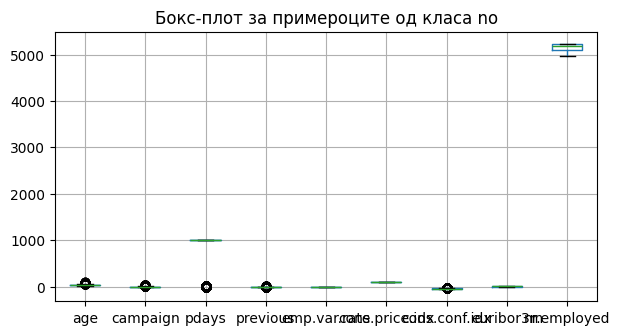

In [ ]:
fig = plt.figure(figsize=(7, 3.5))
df[df.y==0].drop(['y'], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа no')
plt.show()

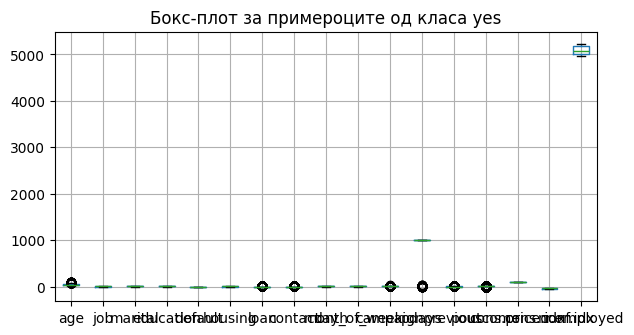

In [ ]:
fig = plt.figure(figsize=(7, 3.5))
df[df.y==1].drop(['y'], axis=1).boxplot()
plt.title('Бокс-плот за примероците од класа yes')
plt.show()

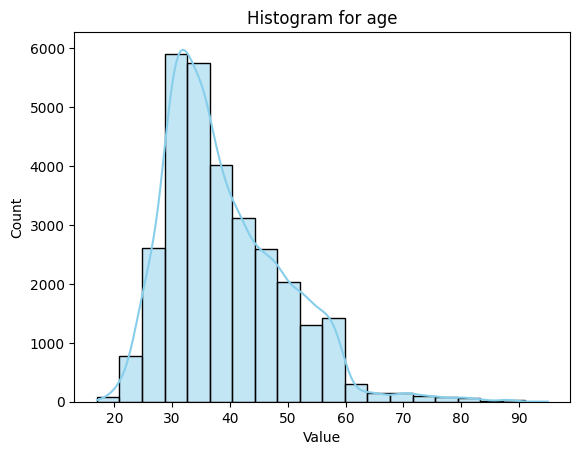

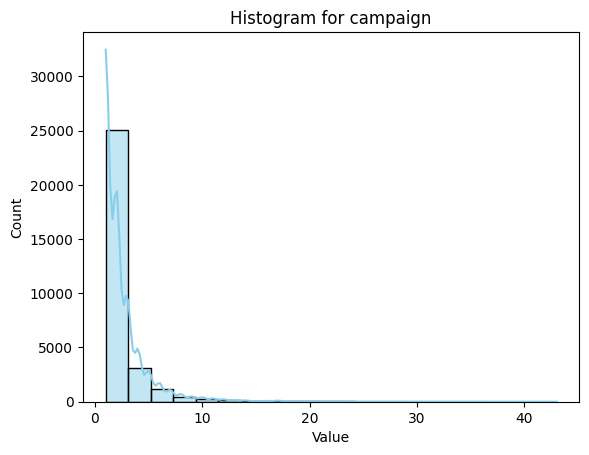

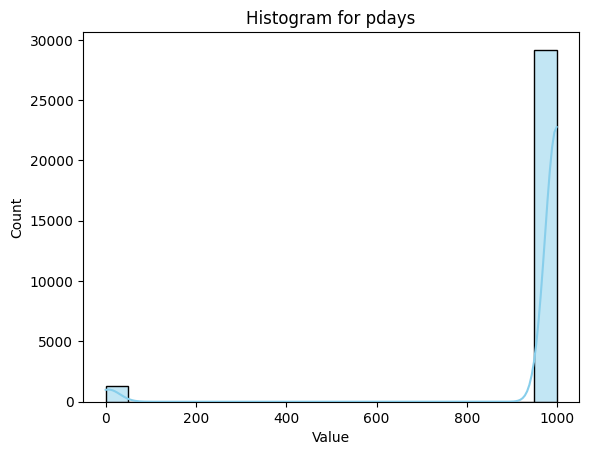

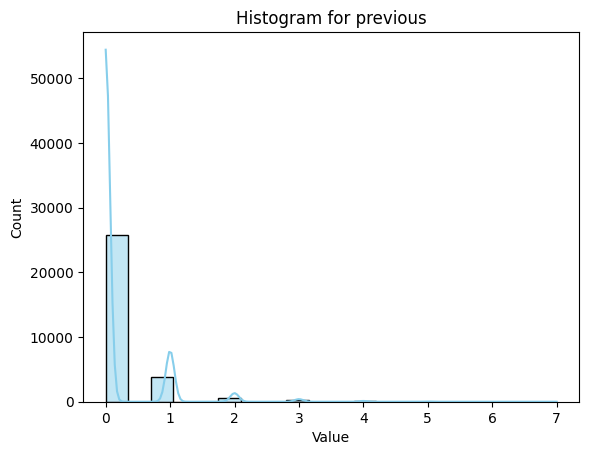

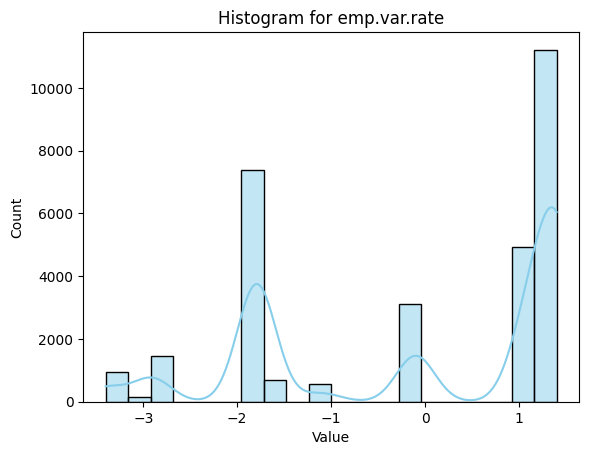

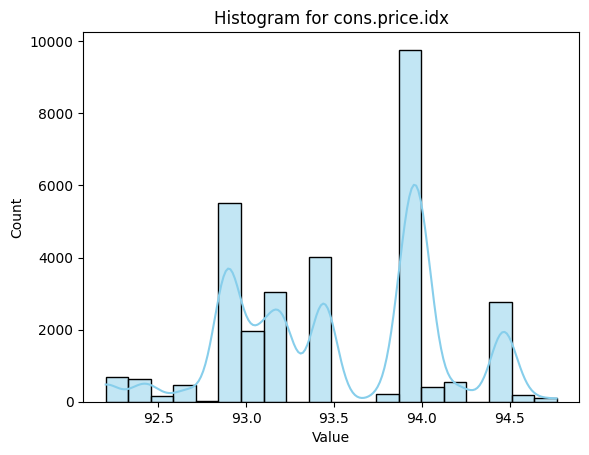

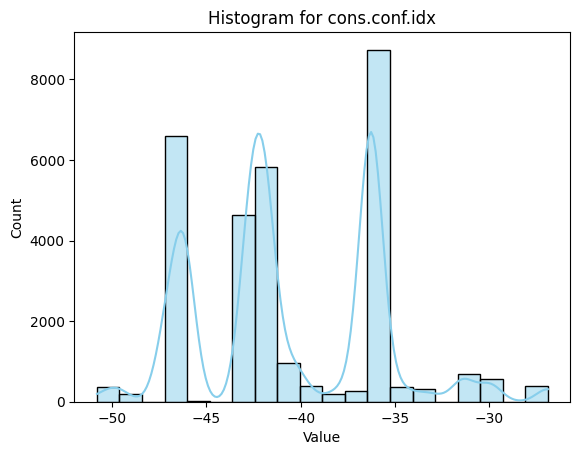

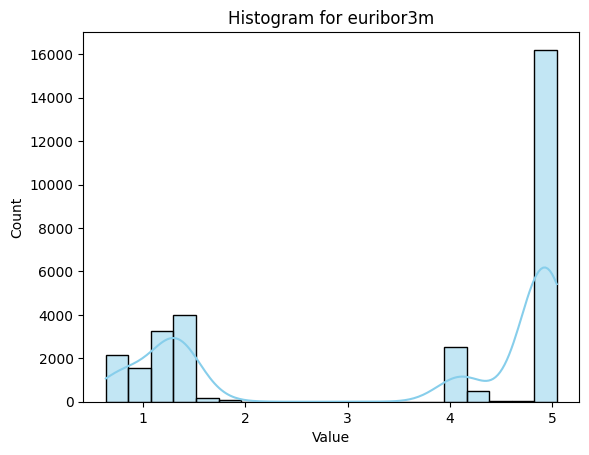

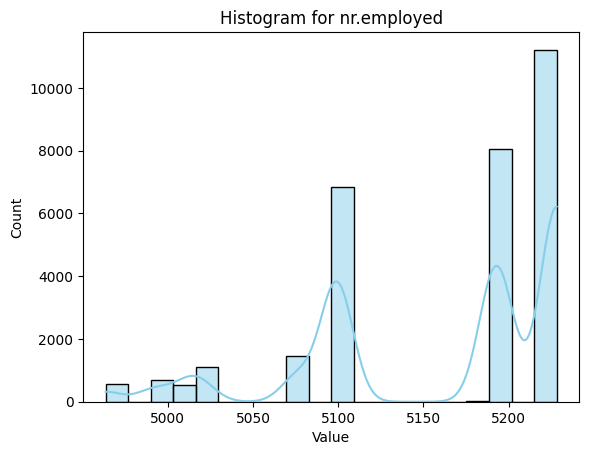

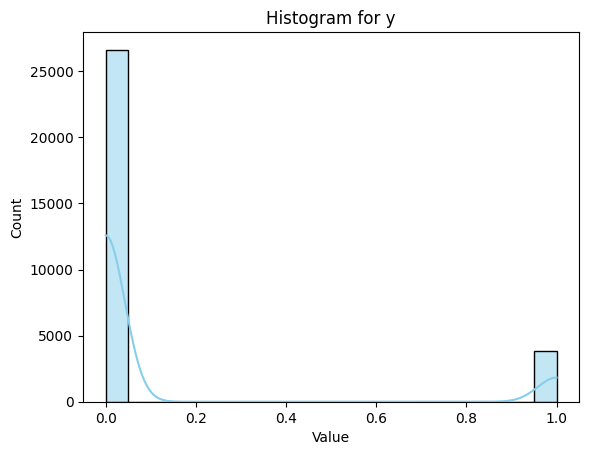

In [ ]:
for column in df.select_dtypes(include=['number']):
    sns.histplot(data=df, x=column, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

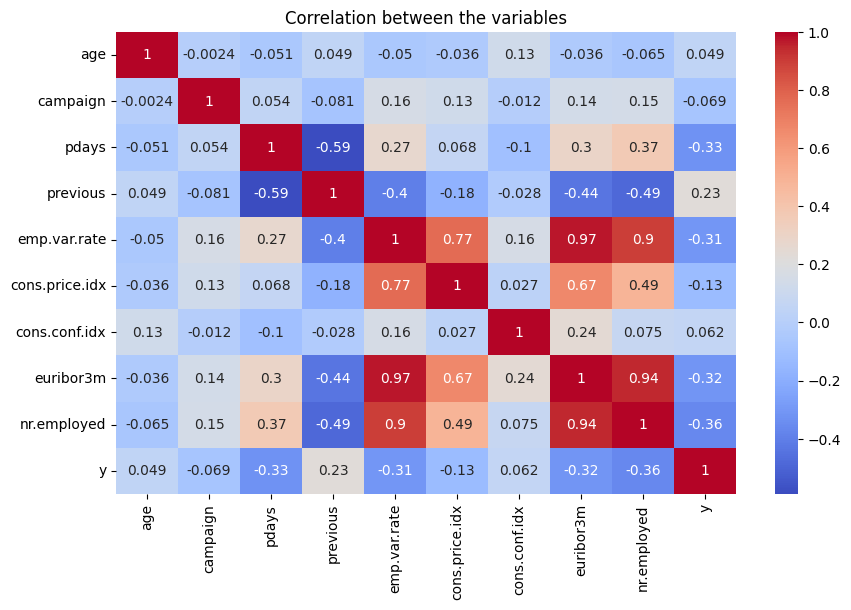

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables')
plt.show()

nr.employed, emp.var.rate, and euribor3m are highly correlated with each other

nr.employed is the one that seems to have the most impact on the target variable

In [ ]:
df.drop('emp.var.rate',axis=1,inplace=True)
df.drop('euribor3m',axis=1,inplace=True)

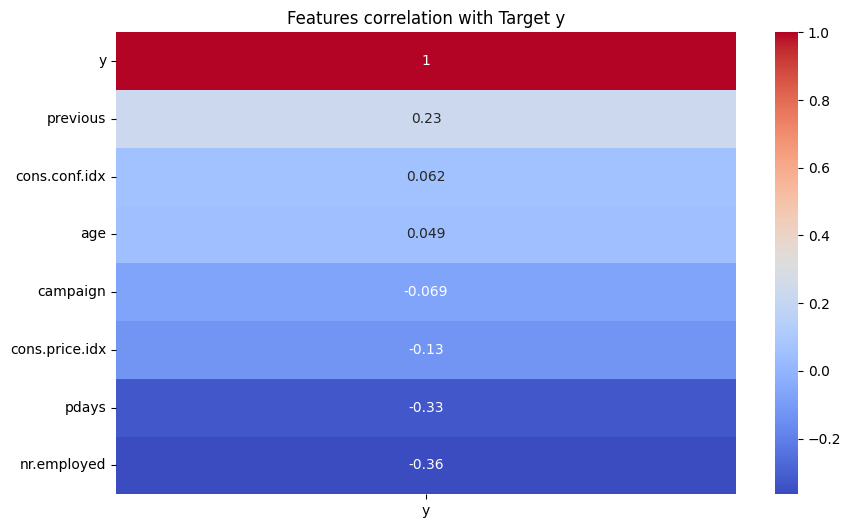

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['y']].sort_values(by='y',ascending=False),annot=True,cmap='coolwarm')
plt.title('Features correlation with Target y')
plt.show()

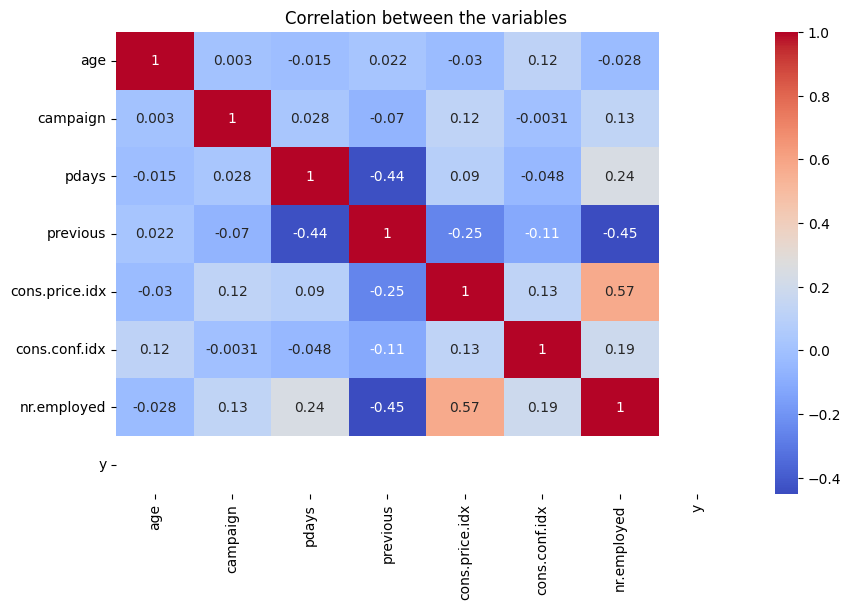

In [ ]:
corr_matrix_no = df[df.y == 0].select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_no,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables')
plt.show()

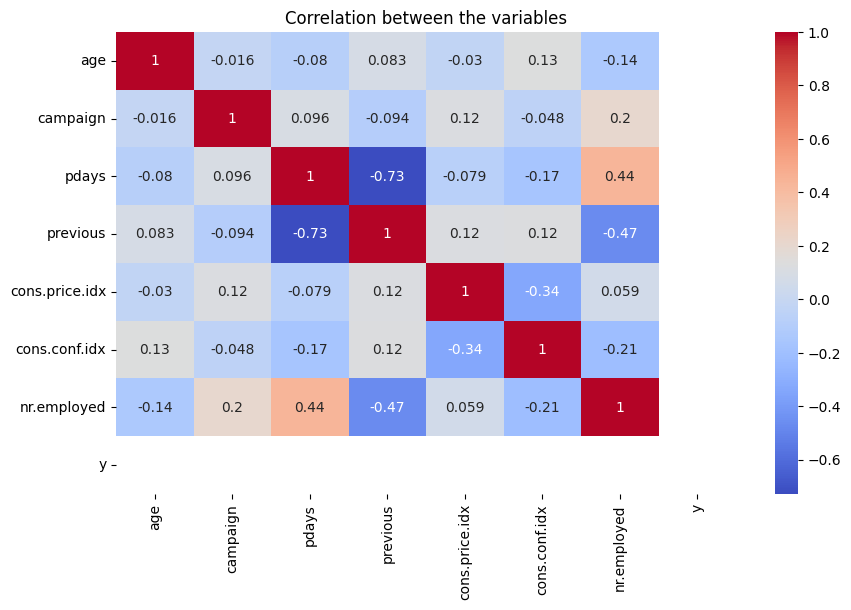

In [ ]:
corr_matrix_no = df[df.y == 1].select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_no,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables')
plt.show()

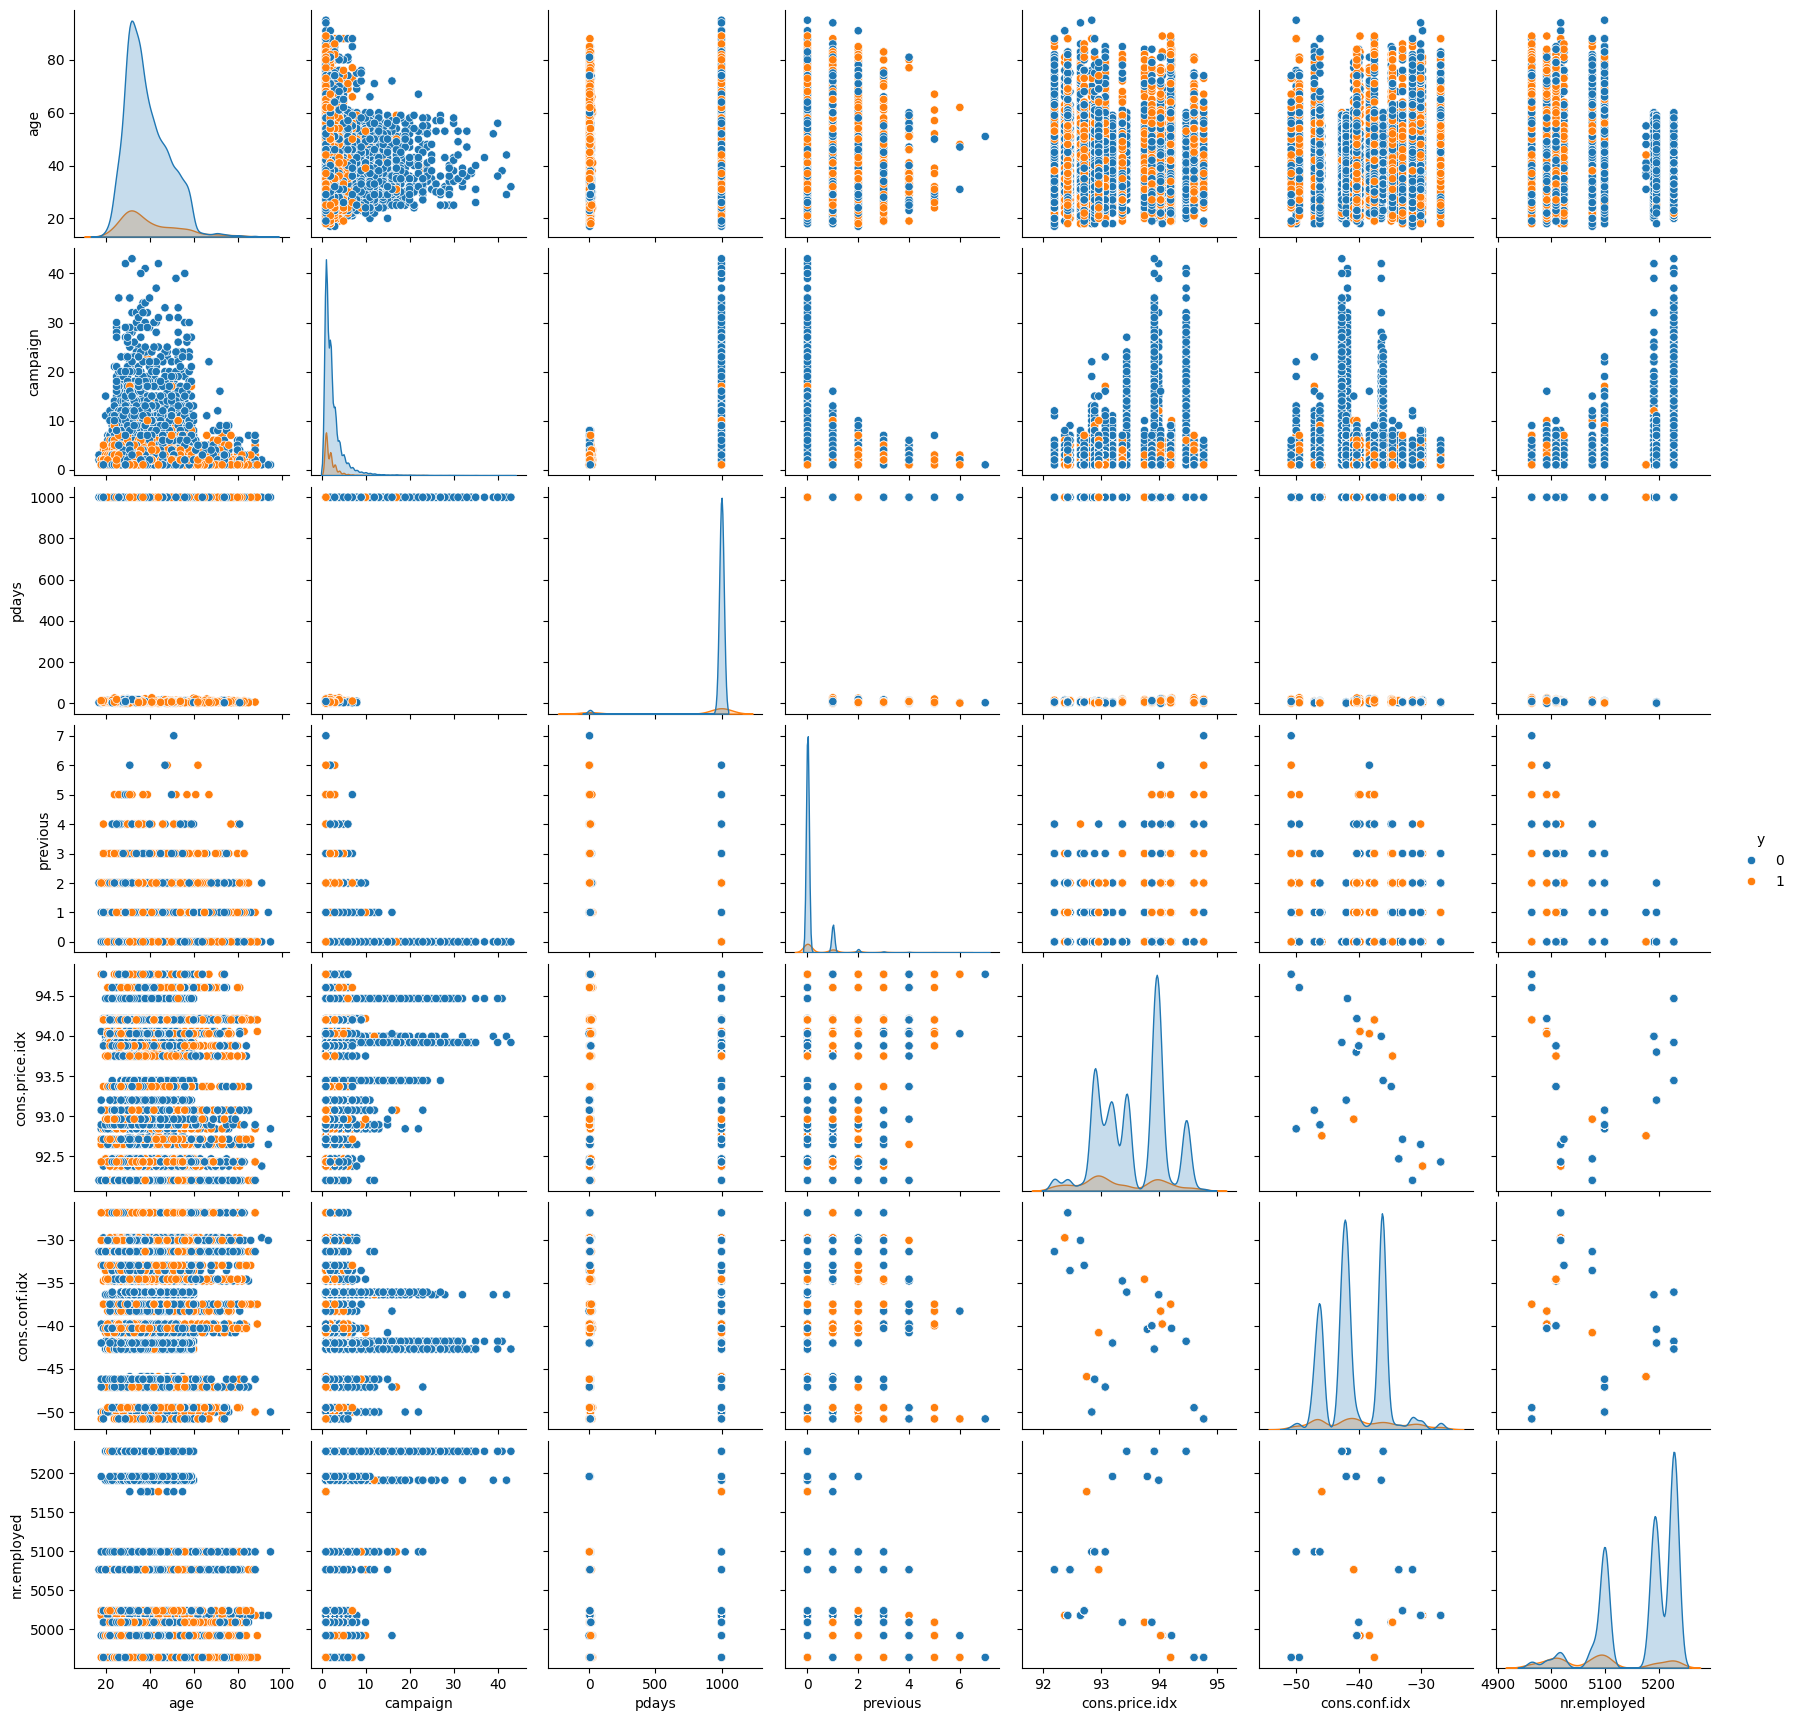

In [ ]:
sns.pairplot(df.select_dtypes(include=['number']), hue="y")

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])

In [ ]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,3.716708,1.193191,3.842791,0.000098,0.541885,0.156389,0.329474,4.249442,2.015022,2.521451,956.332295,0.194273,0.925544,93.523311,-40.602263,5160.813409,0.126574
std,10.333529,3.612755,0.623663,1.988911,0.009919,0.498251,0.363230,0.470030,2.383742,1.398929,2.720150,201.373292,0.522788,0.383466,0.585374,4.789249,75.158065,0.332501
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000,0.000000
25%,31.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,1.000000,93.075000,-42.700000,5099.100000,0.000000
50%,37.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,1.000000,93.444000,-41.800000,5191.000000,0.000000
75%,45.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,3.000000,999.000000,0.000000,1.000000,93.994000,-36.400000,5228.100000,0.000000
max,95.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,43.000000,999.000000,7.000000,2.000000,94.767000,-26.900000,5228.100000,1.000000


# Classification

spliting the dataset

In [ ]:
y = df['y']
X = df.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['age','campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed']


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
x_test_scaled = scaler.transform(X_test[columns_to_scale])

X_train[columns_to_scale] = x_train_scaled
X_test[columns_to_scale] = x_test_scaled

In [ ]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
13510,-0.298166,0,2,3,0,1,0,1,3,2,-0.556009,0.213468,0,1,0.673893,-0.442999,0.896783
19974,-0.105124,9,1,5,0,1,0,0,1,0,-0.556009,0.213468,0,1,-0.134961,0.931455,0.896783
32016,1.149646,6,1,3,0,1,0,0,6,2,-0.191209,0.213468,1,0,-1.075211,-1.171877,-0.815541
16853,1.535729,0,1,0,0,0,0,0,3,2,-0.556009,0.213468,0,1,0.673893,-0.442999,0.896783
28160,0.377480,7,1,5,0,0,0,0,0,1,-0.556009,0.213468,0,1,-0.764639,-1.359303,-0.815541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40416,0.184438,0,0,3,0,1,0,0,1,0,-0.191209,-4.684403,3,2,0.859895,0.473304,-2.242478
8494,0.474001,0,1,6,0,1,0,1,4,4,-0.556009,0.213468,0,1,1.607318,-0.255574,0.896783
1415,1.439209,3,1,2,0,1,0,1,6,2,-0.191209,0.213468,0,1,0.803583,0.868980,0.404324
23532,1.053125,0,0,6,0,0,0,0,1,2,3.091984,0.213468,0,1,-0.134961,0.931455,0.896783


Gaussian Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


print(f'GaussianNB Accuracy: {accuracy_score(y_pred, y_test)}')

GaussianNB Accuracy: 0.694326008527386


LDA:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print(f'LDA Accuracy: {accuracy_score(y_pred, y_test)}')

LDA Accuracy: 0.877172843555264


QDA:

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

print(f'QDA Accuracy: {accuracy_score(y_pred, y_test)}')

QDA Accuracy: 0.8663496228271564


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


It can be observed that the accuracy of the Naive Bayes is lower than that of the LDA and QDA, which may be attributed to its indifference towards the dependency between attribute values and class labels.

Before dropping the features that were highly correlated with each other, QDA gave the worst accuracy score. (the covariance matrix becomes nearly singular)